In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
pd.set_option('display.max_columns',None)

In [5]:
telecom = pd.read_csv('C:/Users/acerpc/Desktop/teleco_camp.csv',skipinitialspace=True)#skipinitialspace忽略分隔符后的空白,默认为False，即不忽略
telecom.head()

,ID,Suc_flag,ARPU,PromCnt12,PromCnt36,PromCntMsg12,PromCntMsg36,Class,Age,Gender,HomeOwner,AvgARPU,AvgHomeValue,AvgIncome
0,12,1,50.0,5.65,9.50,1.6,3.0,4,79.0,M,H,49.894904,33400,39460
1,53,0,NaN,4.50,9.00,1.4,3.6,3,71.0,M,H,48.574742,37600,33545
2,67,1,25.0,6.40,11.00,2.0,3.6,1,79.0,F,H,49.272646,100400,42091
3,71,1,80.0,7.15,10.25,2.4,3.6,1,63.0,F,H,47.334953,39900,39313
4,142,1,15.0,5.90,10.50,2.0,3.8,1,NaN,F,U,47.827404,47500,0


In [6]:
telecom.describe(include='all')

,ID,Suc_flag,ARPU,PromCnt12,PromCnt36,PromCntMsg12,PromCntMsg36,Class,Age,Gender,HomeOwner,AvgARPU,AvgHomeValue,AvgIncome
count,9686.000000,9686.000000,4843.000000,9686.000000,9686.000000,9686.000000,9686.000000,9686.000000,7279.000000,9686,9686,9686.000000,9686.000000,9686.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,H,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5223,5377,NaN,NaN,NaN
mean,97975.474086,0.500000,78.121722,3.447212,7.337059,1.178402,2.390935,2.424530,59.150845,NaN,NaN,52.905156,110986.299814,40491.444249
std,56550.171120,0.500026,62.225686,1.231890,1.952436,0.287226,0.914314,1.049047,16.516400,NaN,NaN,4.993775,98670.855450,28707.494146
min,12.000000,0.000000,5.000000,0.750000,1.000000,0.200000,0.400000,1.000000,0.000000,NaN,NaN,46.138968,0.000000,0.000000
25%,48835.500000,0.000000,50.000000,2.900000,6.250000,1.000000,1.400000,2.000000,47.000000,NaN,NaN,49.760116,52300.000000,24464.000000
50%,99106.000000,0.500000,65.000000,3.250000,7.750000,1.200000,2.600000,2.000000,60.000000,NaN,NaN,50.876672,76900.000000,43100.000000
75%,148538.750000,1.000000,100.000000,3.650000,8.250000,1.400000,3.200000,3.000000,73.000000,NaN,NaN,54.452822,128175.000000,56876.000000


In [7]:
#数据清洗
#对字符串进行编码
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
telecom['Gender'] = le.fit_transform(telecom['Gender'])# 对Gender进行自动编码
#test['gender']=le.transform(test['gender']) 不需要重新训练
telecom['HomeOwner'].replace({'H':0,'U':1},inplace=True)# 对HomeOwner进行人工编码

In [8]:
#错误值处理
for col in ('AvgIncome', 'Age', 'AvgHomeValue'):
    telecom[col].replace({0:np.nan},inplace=True)# AvgIncome、Age、AvgHomeValue的0值实为缺失值

In [10]:
#填补缺失值
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values=np.nan,strategy='mean',axis=0)# 使用均值填补
telecom = pd.DataFrame(imputer.fit_transform(telecom),columns=telecom.columns)
telecom.head()
#imputer.transform(test)

,ID,Suc_flag,ARPU,PromCnt12,PromCnt36,PromCntMsg12,PromCntMsg36,Class,Age,Gender,HomeOwner,AvgARPU,AvgHomeValue,AvgIncome
0,12.0,1.0,50.000000,5.65,9.50,1.6,3.0,4.0,79.000000,1.0,0.0,49.894904,33400.0,39460.000000
1,53.0,0.0,78.121722,4.50,9.00,1.4,3.6,3.0,71.000000,1.0,0.0,48.574742,37600.0,33545.000000
2,67.0,1.0,25.000000,6.40,11.00,2.0,3.6,1.0,79.000000,0.0,0.0,49.272646,100400.0,42091.000000
3,71.0,1.0,80.000000,7.15,10.25,2.4,3.6,1.0,63.000000,0.0,0.0,47.334953,39900.0,39313.000000
4,142.0,1.0,15.000000,5.90,10.50,2.0,3.8,1.0,59.158972,0.0,1.0,47.827404,47500.0,53513.457361


In [11]:
#处理极端值
def blk(up,down):# 'blk' will return a function
    def f(data):
        if data>up:
            data = up
        elif data < down:
            dat a= down
        return data
    return f
down = telecom.Age.quantile(0.01)
up = telecom.Age.quantile(0.99)
blk_tot = blk(up,down)# 'blk_tot' is a function
telecom['Age'] = telecom.Age.map(blk_tot)

In [13]:
#变量筛选
#使用模型进行筛选
#使用可输出变量重要性的模型进行筛选
from sklearn import ensemble
X = telecom.loc[:,'PromCnt12':]
y = telecom['Suc_flag']
crf = ensemble.RandomForestClassifier()#随机森林
crf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [14]:
pd.Series(X.columns,index=crf.feature_importances_).sort_index(ascending=False)

0.360263       PromCnt12
0.307988    PromCntMsg12
0.076483       PromCnt36
0.066482    PromCntMsg36
0.052241         AvgARPU
0.040490    AvgHomeValue
0.033816       AvgIncome
0.030572             Age
0.018453           Class
0.008112          Gender
0.005100       HomeOwner
dtype: object

In [58]:
#用IV值做变量筛选--发现非线性关系
# 定义计算IV值的函数
def IV_(y,x):
    all_i = y.groupby(x).count()
    bad_i = y.groupby(x).sum()
    good_i = all_i-bad_i
    p1 = bad_i/bad_i.sum()
    p0 = good_i/good_i.sum()
    woe = np.log((p1+1e-5)/(p0+1e-5))
    Iv = (p1-p0)*woe
    return Iv.sum()

In [26]:
y.groupby(telecom.HomeOwner).count()

HomeOwner
0.0    5377
1.0    4309
Name: Suc_flag, dtype: int64

In [23]:
y.groupby(telecom.HomeOwner).sum()

HomeOwner
0.0    2708.0
1.0    2135.0
Name: Suc_flag, dtype: float64

In [25]:
y.groupby(telecom.HomeOwner).count()-y.groupby(telecom.HomeOwner).sum()

HomeOwner
0.0    2669.0
1.0    2174.0
Name: Suc_flag, dtype: float64

In [86]:
IV = pd.DataFrame()
for col in X.columns:
    if len(X[col].unique()) > 10 and X[col].dtype!=np.object:# 将水平数大于10的变量进行离散化后，使用IV值进行变量重要性判断
        try :
            tem = pd.cut(X[col],5) # 等分离散
        except:
            tem = pd.qcut(X[col],5)# 等宽离散
        df = pd.DataFrame([col],index=[IV_(y,tem)])
    else:
        df = pd.DataFrame([col],index=[IV_(y,X[col])])# 水平数不大于10的作为离散变量直接计算IV
    IV = pd.concat([IV,df])
sorted_IV = IV.sort_index(ascending=False)
sorted_IV

,0
0.885313,PromCnt12
0.326262,PromCntMsg12
0.043248,PromCntMsg36
0.040798,Class
0.020960,PromCnt36
0.016137,AvgARPU
0.013139,Age
0.010793,AvgHomeValue
0.003858,AvgIncome
0.000263,HomeOwner


In [101]:
#变量筛选有多种方法，本例选取IV值最大的前8个变量作为示例
select_feature = ['Suc_flag',]
select_feature.extend(list(sorted_IV[0].iloc[:8]))
telecom1 = telecom[select_feature]
telecom1.head()

,Suc_flag,PromCnt12,PromCntMsg12,PromCntMsg36,Class,PromCnt36,AvgARPU,Age,AvgHomeValue
0,1.0,5.65,1.6,3.0,4.0,9.50,49.894904,79.000000,33400.0
1,0.0,4.50,1.4,3.6,3.0,9.00,48.574742,71.000000,37600.0
2,1.0,6.40,2.0,3.6,1.0,11.00,49.272646,79.000000,100400.0
3,1.0,7.15,2.4,3.6,1.0,10.25,47.334953,63.000000,39900.0
4,1.0,5.90,2.0,3.8,1.0,10.50,47.827404,59.158972,47500.0


In [102]:
#对离散变量进行哑变量变换
telecom2 = telecom1.join(pd.get_dummies(telecom1['Class'])).drop('Class',axis=1)
telecom2.head()

,Suc_flag,PromCnt12,PromCntMsg12,PromCntMsg36,PromCnt36,AvgARPU,Age,AvgHomeValue,1.0,2.0,3.0,4.0
0,1.0,5.65,1.6,3.0,9.50,49.894904,79.000000,33400.0,0,0,0,1
1,0.0,4.50,1.4,3.6,9.00,48.574742,71.000000,37600.0,0,0,1,0
2,1.0,6.40,2.0,3.6,11.00,49.272646,79.000000,100400.0,1,0,0,0
3,1.0,7.15,2.4,3.6,10.25,47.334953,63.000000,39900.0,1,0,0,0
4,1.0,5.90,2.0,3.8,10.50,47.827404,59.158972,47500.0,1,0,0,0


In [107]:
#划分训练集和测试集
from sklearn.model_selection import train_test_split
x = telecom2.loc[:,'PromCnt12':]
y = telecom2['Suc_flag']
train_data,test_data,trian_target,test_target=train_test_split(x,y,train_size=0.6,random_state=2)

D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [108]:
#标准化
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
minmaxscaler.fit(train_data)
scaled_train_data = minmaxscaler.transform(train_data)
scaled_test_data = minmaxscaler.transform(test_data)

In [110]:
#建立逻辑回归模型
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(scaled_train_data,trian_target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [111]:
#预测分类标签
trian_predict = log.predict(scaled_train_data)
test_predict = log.predict(scaled_test_data)

In [113]:
#预测概率
train_p = log.predict_proba(scaled_train_data)[:,1]# 计算分别属于各类的概率，取标签为1的概率
test_p = log.predict_proba(scaled_test_data)[:,1]
test_p

array([0.42333261, 0.67609234, 0.45139596, ..., 0.54484673, 0.41622793,
       0.84475701])

In [114]:
#评估
#mean accuracy
log.score(scaled_train_data,trian_target)

0.7666494579246257

In [118]:
#混淆矩阵
from sklearn import metrics
print(metrics.classification_report(trian_target,trian_predict))
print(metrics.confusion_matrix(trian_target,trian_predict,labels=[0,1]))

             precision    recall  f1-score   support

        0.0       0.76      0.76      0.76      2867
        1.0       0.77      0.77      0.77      2944

avg / total       0.77      0.77      0.77      5811

[[2182  685]
 [ 671 2273]]


Text(0.6,0.6,'AUC=0.8284')

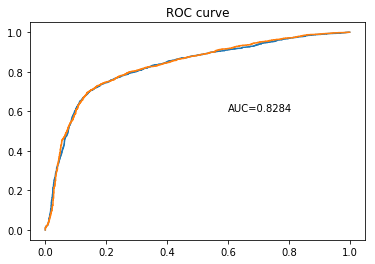

In [122]:
#ROC曲线与AUC
fpr_train,tpr_train,th_train = metrics.roc_curve(trian_target,train_p)
fpr_test,tpr_test,th_test = metrics.roc_curve(test_target,test_p)
plt.plot(fpr_train,tpr_train)
plt.plot(fpr_test,tpr_test)
plt.title('ROC curve')
plt.text(0.6,0.6,'AUC=%.4f'%metrics.auc(fpr_test,tpr_test))

In [124]:
#交叉验证优化
from sklearn.linear_model import LogisticRegressionCV
logcv = LogisticRegressionCV(Cs=10,cv=4)# Cs为正则化系数的倒数,自动生成10个正则化系数
#cv指分成几份
logcv.fit(scaled_train_data,trian_target)
logcv.scores_

{1.0: array([[0.5065382 , 0.59050241, 0.6386786 , 0.7026841 , 0.76944253,
         0.77013076, 0.76462491, 0.76393668, 0.76462491, 0.76462491],
        [0.5065382 , 0.58017894, 0.63041982, 0.70406056, 0.74741913,
         0.75911906, 0.76324845, 0.76118376, 0.76187199, 0.76187199],
        [0.5065382 , 0.56710255, 0.62353751, 0.6937371 , 0.7598073 ,
         0.77563661, 0.77770131, 0.77701308, 0.77701308, 0.77701308],
        [0.50688705, 0.57506887, 0.60950413, 0.68250689, 0.75826446,
         0.76721763, 0.76170799, 0.7637741 , 0.76446281, 0.76446281]])}

In [125]:
logcv.C_ # 模型交叉验证分数最高的C值,正则化系数的倒数

array([2.7825594])

In [126]:
logcv.coef_

array([[ 4.55193055, 19.53503563, -1.57238442, -8.47526306, -2.25030944,
         0.55756845,  1.17615512,  0.34357133, -0.13766803, -0.15653428,
        -0.13226195]])

Text(0.6,0.6,'AUC=0.8300')

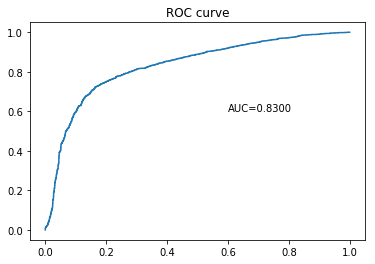

In [130]:
testcv_p = logcv.predict_proba(scaled_test_data)[:,1]
fpr,tpr,th = metrics.roc_curve(test_target,testcv_p)
plt.plot(fpr,tpr)
plt.title('ROC curve')
plt.text(0.6,0.6,'AUC=%.4f'%metrics.auc(fpr,tpr))